# Baseline Prediction

This notebook is the first attempt at creating an algorithm to predict the string and fret positions based off of the frequency, time, and duration of a note. The assumption is currenty being made that the monophonic input has gone through a pitch detection algorithm and the beat information has been preset by the user (metronome + time signature). The pitch detection aspect will hopefully be tackled later, but for now the beat detection part will be left out.

This baseline model picks the lowest possible fret position for every note. This is of course absurd, but it a good baseline measure before implementing more complicated algorithms. It also serves the purpose of helping to set up the pipline necessary to process the data and output the visual of the tab. The next algorithms I'd like to implement will be much more intelligent and hopefully surpass the 50% accuracy score. Which leads to the next part of the implementation. Right now the evaluation metric is a percentage correct, which might not be the best way to evaluate performance. I'd like to create a different cost function which looks at the distance that the predicted fret is from the actual fret. This might be a slightly better metric, and I'd like to use both moving forward. 

All the functions are located in the helper functions .py file, and some of the code was written by the folks at GuitarSet who created the dataset (Q. Xi, R. Bittner, J. Pauwels, X. Ye, and J. P. Bello).

#### Import Packages

In [3]:
import jams
import numpy as np
from matplotlib import lines as mlines, pyplot as plt
import tempfile
import librosa
import sox
import os
import pandas as pd
import lib.helper_functions as hf

#### Load the Jams File and Generate the Data

In [5]:
jam = jams.load("data/00_BN1-129-Eb_solo.jams")
df = hf.generate_data(jam)

#### Split the Data into Train and Target

In [6]:
df_train = df[['start_time','duration','midi_note']]
df_target = df['string']

#### Make Baseline Prediction and Evaluate Model

In [7]:
df_pred = hf.baseline_prediction(df_train)
score = hf.evaluate_model(df_pred['string'], df_target)

/Users/elupini/Documents/UVic/CSC_475/Group_Project_v2/lib/helper_functions.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = df.apply(lambda x: baseline_helper(x.midi_note), axis=1)


In [8]:
print(score)

0.5070422535211268


#### Visualize Result and Orignal Tab

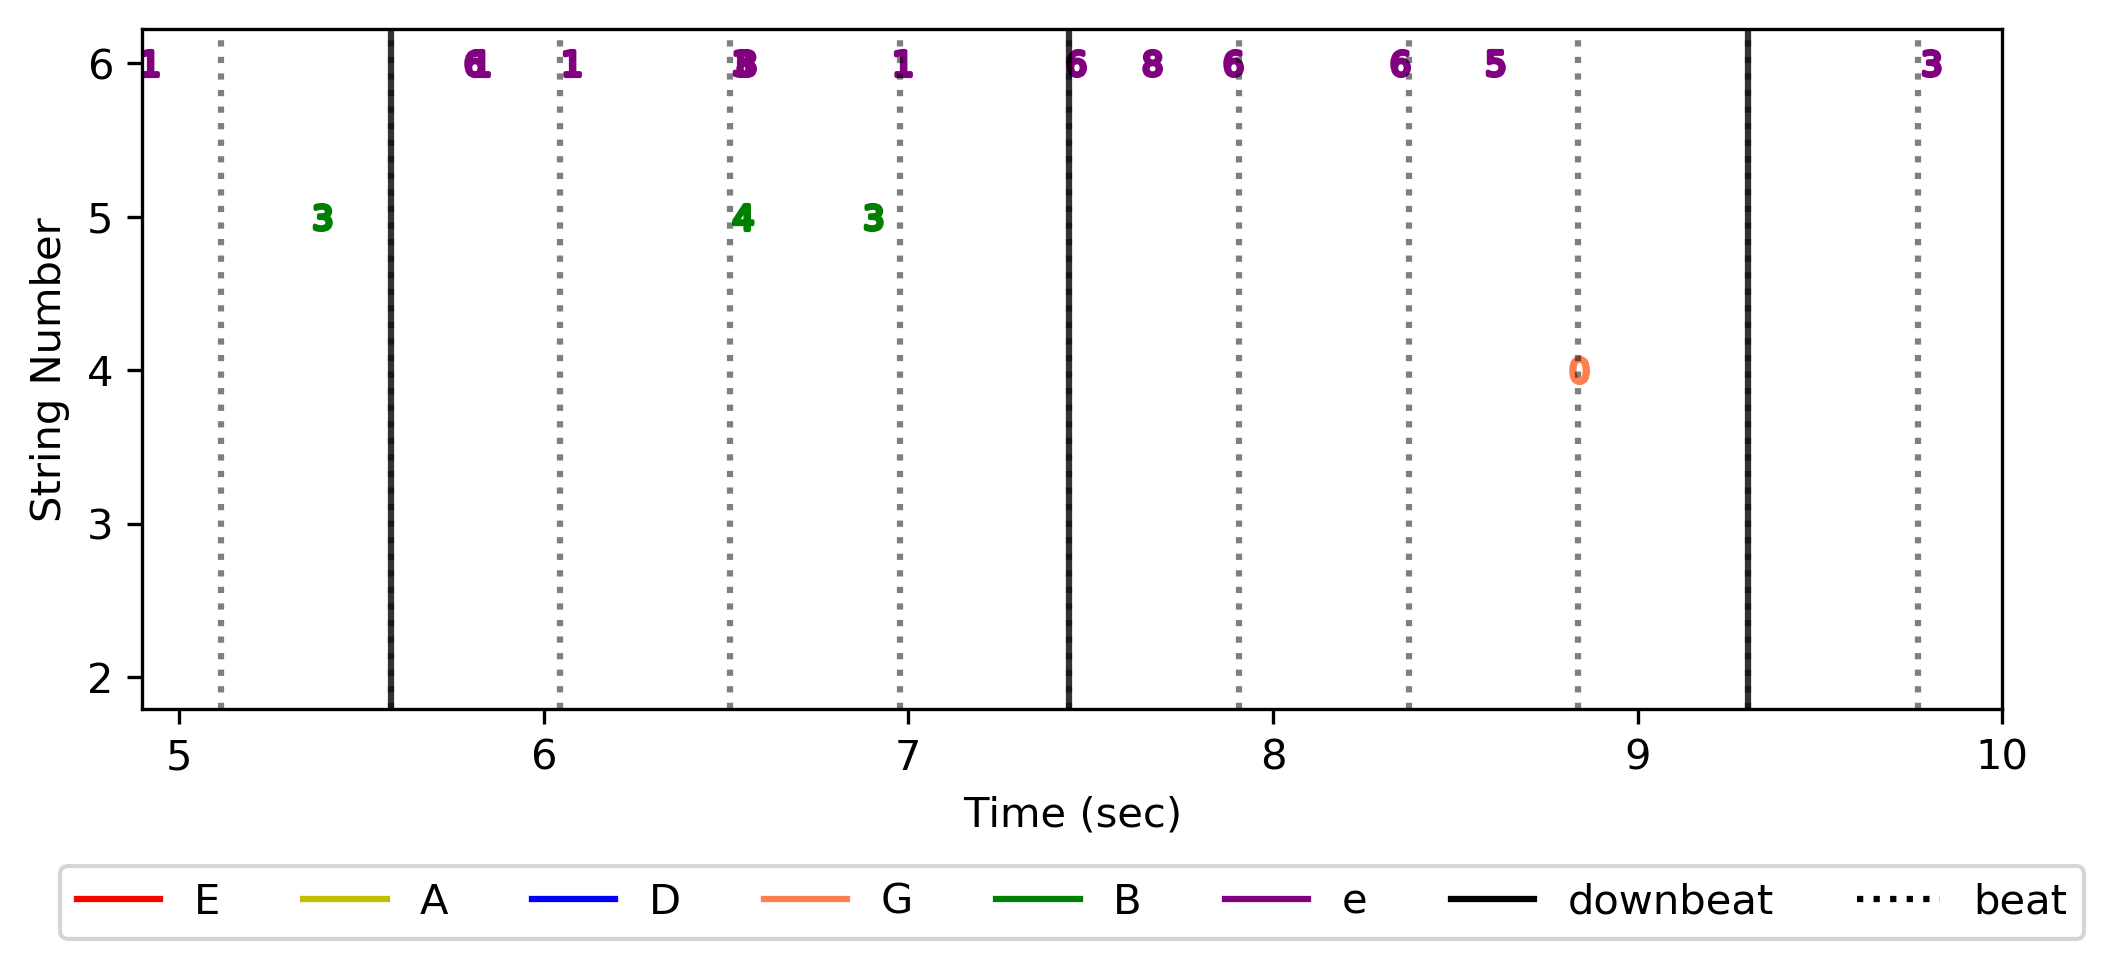

In [9]:
hf.tabularize_result(jam,df_pred)

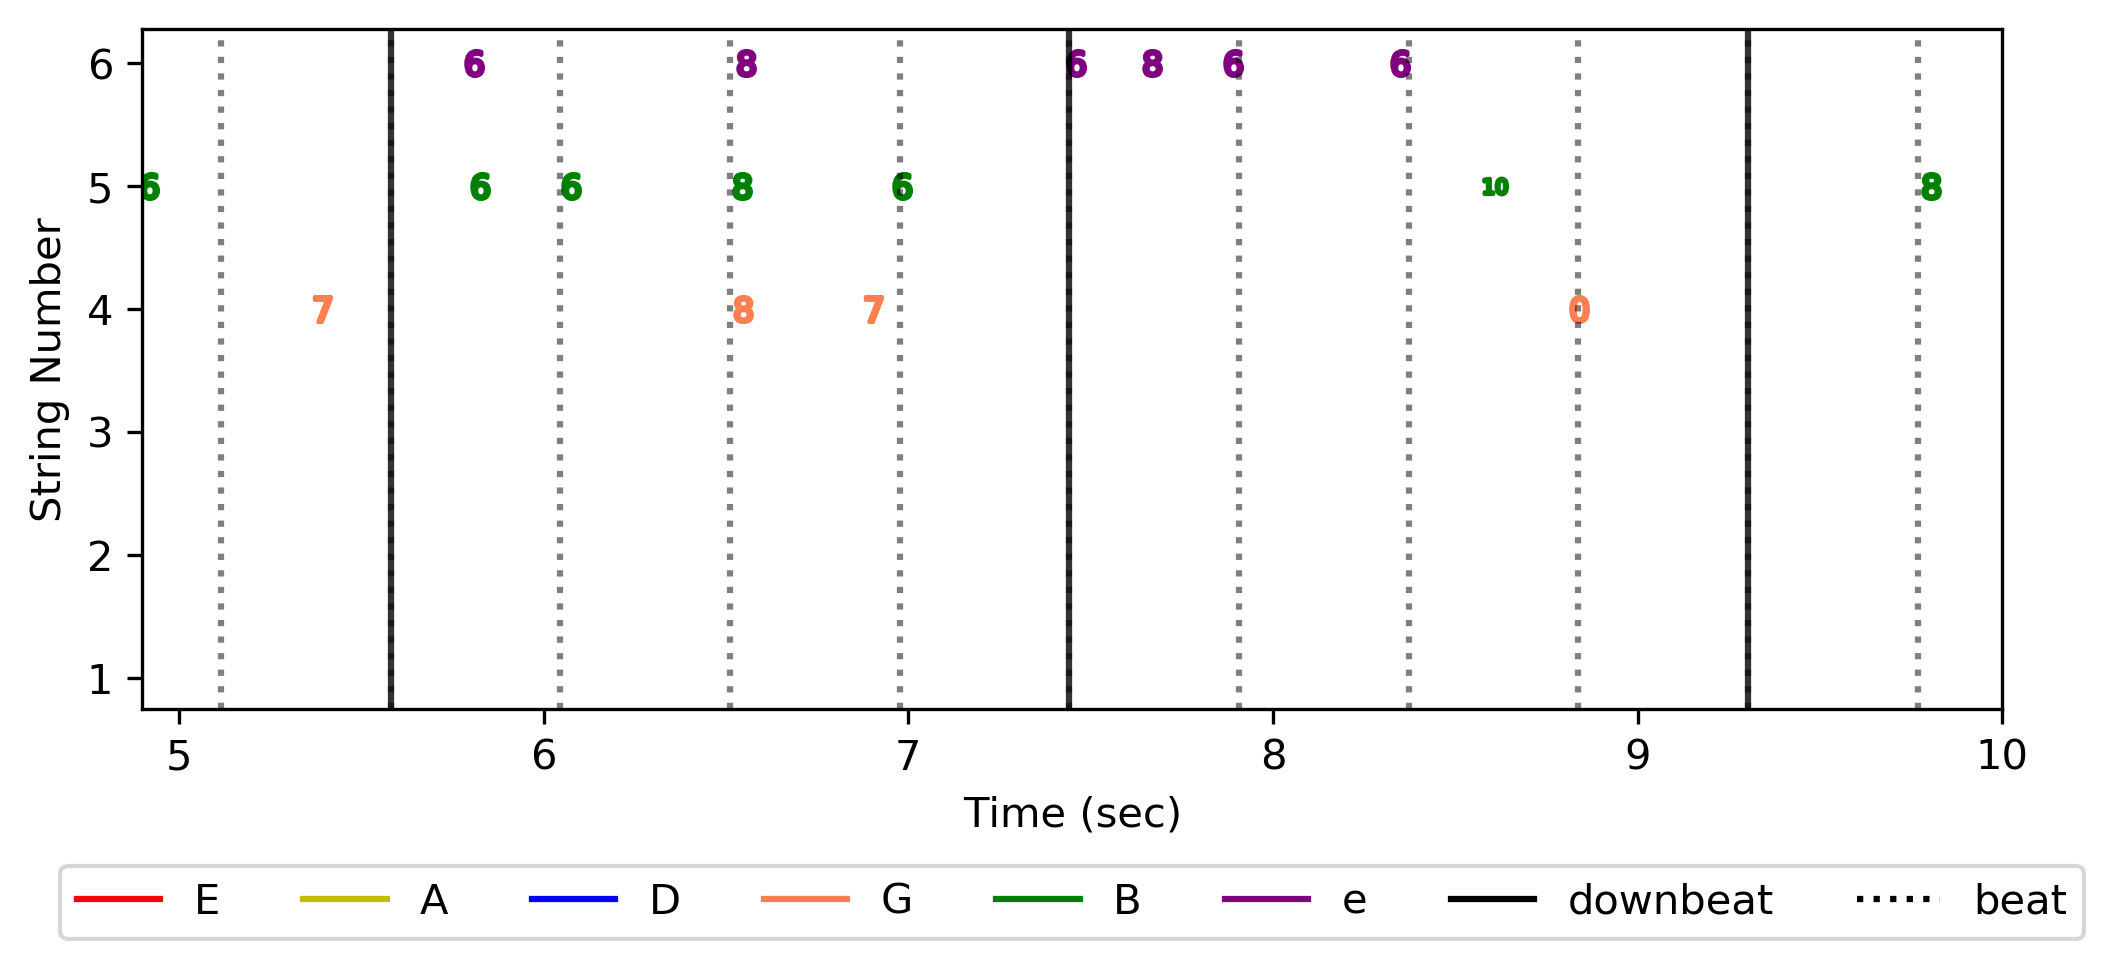

In [6]:
hf.tabularize_result(jam,df)